In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
file_path = r"2021-ascm-case-competition_school-round_data-exhibits 1 (3).xlsx"

try:
    with open(file_path):
        pass
except FileNotFoundError:
    print(f"File not found: {file_path}")
    
# Read Excel sheets
try:
   risq_supp = pd.read_excel(file_path, sheet_name="Data Exhibit-1", index_col=0)
except FileNotFoundError:
    print(f"Error reading Excel file: {file_path}")

def clean_revenue(revenue_str):
    return float(revenue_str.replace('$', '').replace('M', '').replace(',', ''))* 1e6

# Clean the 'Revenue' column
risq_supp['Revenue'] = risq_supp['Revenue'].apply(clean_revenue)

#risq_supp.reset_index(drop=True, inplace=True)

risq_supp.head()

,Supplier Name,Location,Revenue,Cash from Operations,Credit Rating,S-OTD,Single Source,IP Protection,Data security,Labour Unrests,Environmental Incidents
index,,,,,,,,,,,
1,Plaxian,US,6.040000e+09,354000000,3,0.91,Y,N,9,Y,N
2,GutesGlas,Germany,8.293000e+09,904628910,3,0.85,N,N,8,N,N
3,Boavidro,Brazil,9.287000e+09,363900000,3,0.63,N,N,8,N,N
4,Saanch,India,3.147000e+09,435960000,2,0.90,N,N,9,N,N
5,RealGlass,China,3.771900e+10,3996000000,1,0.82,Y,Y,10,Y,Y


at firtste the supplyers COVID risks

In [100]:
import folium
import pandas as pd

df = risq_supp

contamination_data = {
    'US': 500,
    'Germany': 200,
    'Brazil': 300,
    'India': 150,
    'China': 50,
    'Philippines': 250,
    'Saudi Arabia': 200,
    'Italy': 100
}

# Add contamination data to the DataFrame
df['Contamination'] = [contamination_data[loc] for loc in df['Location']]

def calculate_risk(contamination_level):
    if contamination_level > 450:
        return 1
    elif contamination_level > 400:
        return 2
    elif contamination_level > 350:
        return 3
    elif contamination_level > 300:
        return 4
    elif contamination_level > 250:
        return 5
    elif contamination_level > 200:
        return 6
    elif contamination_level > 150:
        return 7
    elif contamination_level > 100:
        return 8
    elif contamination_level > 50:
        return 9
    else:
        return 10


df['Pandemic Domain'] = df['Contamination'].apply(calculate_risk)

m.save('supplier_map_with_contamination_and_ranking.html')


def map_to_domain(row):
    if row['Labour Unrests'] == 'Y' and row['Environmental Incidents'] == 'Y':
        return 'Y Y'
    elif row['Labour Unrests'] == 'Y' and row['Environmental Incidents'] == 'N':
        return 'Y N'
    elif row['Labour Unrests'] == 'N' and row['Environmental Incidents'] == 'Y':
        return 'Y N'
    else:
        return 'N N'

df['Regulatory domain'] = df.apply(map_to_domain, axis=1)

def map_to_domain(row):
    if row['Single Source'] == 'Y' and row['IP Protection'] == 'Y':
        return 'Y Y'
    elif row['Single Source'] == 'Y' and row['IP Protection'] == 'N':
        return 'Y N'
    elif row['Single Source'] == 'N' and row['IP Protection'] == 'N':
        return 'N N'
    else:
        return 'Invalid Combination'

df['Dependency domain'] = df.apply(map_to_domain, axis=1)

mapping = {
    'Y Y': '1 ',
    'Y N': '2 ',
    'N N': '3 '
}

df['Dependency domain'] = df['Dependency domain'].map(mapping)
df['Regulatory domain'] = df['Regulatory domain'].map(mapping)



df.head()



,Supplier Name,Location,Revenue,Cash from Operations,Credit Rating,S-OTD,Single Source,IP Protection,Data security,Labour Unrests,Environmental Incidents,Contamination,Pandemic Domain,Regulatory domain,Dependency domain
index,,,,,,,,,,,,,,,
1,Plaxian,US,6.040000e+09,354000000,3,0.91,Y,N,9,Y,N,500,1,2,2
2,GutesGlas,Germany,8.293000e+09,904628910,3,0.85,N,N,8,N,N,200,7,3,3
3,Boavidro,Brazil,9.287000e+09,363900000,3,0.63,N,N,8,N,N,300,5,3,3
4,Saanch,India,3.147000e+09,435960000,2,0.90,N,N,9,N,N,150,8,3,3
5,RealGlass,China,3.771900e+10,3996000000,1,0.82,Y,Y,10,Y,Y,50,10,1,1


stepes to clean the data 


In [101]:


df['Cash/Revenue Ratio'] = df['Cash from Operations '] / df['Revenue']

#(higher is better)
df['Cash/Revenue Rank'] = df['Cash/Revenue Ratio'].rank()

#(lower is better)
df['Credit Rank'] = df['Credit Rating'].rank(ascending=False)

# Generate the final rank considering both Cash/Revenue and Credit Rank
df['Final Rank'] = df['Cash/Revenue Rank'] + df['Credit Rank']

# Assign the final ranks
df['Financial Domain'] = df['Final Rank'].rank(method='min').astype(int)


# Display the result
df.head()


,Supplier Name,Location,Revenue,Cash from Operations,Credit Rating,S-OTD,Single Source,IP Protection,Data security,Labour Unrests,Environmental Incidents,Contamination,Pandemic Domain,Regulatory domain,Dependency domain,Cash/Revenue Ratio,Cash/Revenue Rank,Credit Rank,Final Rank,Financial Domain
index,,,,,,,,,,,,,,,,,,,,
1,Plaxian,US,6.040000e+09,354000000,3,0.91,Y,N,9,Y,N,500,1,2,2,0.058609,4.0,6.0,10.0,3
2,GutesGlas,Germany,8.293000e+09,904628910,3,0.85,N,N,8,N,N,200,7,3,3,0.109083,7.0,6.0,13.0,7
3,Boavidro,Brazil,9.287000e+09,363900000,3,0.63,N,N,8,N,N,300,5,3,3,0.039184,3.0,6.0,9.0,2
4,Saanch,India,3.147000e+09,435960000,2,0.90,N,N,9,N,N,150,8,3,3,0.138532,9.0,10.0,19.0,11
5,RealGlass,China,3.771900e+10,3996000000,1,0.82,Y,Y,10,Y,Y,50,10,1,1,0.105941,6.0,12.0,18.0,10


In [102]:
df.rename(columns={'S-OTD' : 'Quality service domain','Data security' : 'Cybersecurity'}, inplace=True)

In [103]:
df.head()


,Supplier Name,Location,Revenue,Cash from Operations,Credit Rating,Quality service domain,Single Source,IP Protection,Cybersecurity,Labour Unrests,Environmental Incidents,Contamination,Pandemic Domain,Regulatory domain,Dependency domain,Cash/Revenue Ratio,Cash/Revenue Rank,Credit Rank,Final Rank,Financial Domain
index,,,,,,,,,,,,,,,,,,,,
1,Plaxian,US,6.040000e+09,354000000,3,0.91,Y,N,9,Y,N,500,1,2,2,0.058609,4.0,6.0,10.0,3
2,GutesGlas,Germany,8.293000e+09,904628910,3,0.85,N,N,8,N,N,200,7,3,3,0.109083,7.0,6.0,13.0,7
3,Boavidro,Brazil,9.287000e+09,363900000,3,0.63,N,N,8,N,N,300,5,3,3,0.039184,3.0,6.0,9.0,2
4,Saanch,India,3.147000e+09,435960000,2,0.90,N,N,9,N,N,150,8,3,3,0.138532,9.0,10.0,19.0,11
5,RealGlass,China,3.771900e+10,3996000000,1,0.82,Y,Y,10,Y,Y,50,10,1,1,0.105941,6.0,12.0,18.0,10


In [104]:

supp_RI = df[['Supplier Name', 'Pandemic Domain', 'Financial Domain', 'Quality service domain', 'Dependency domain', 'Cybersecurity', 'Regulatory domain']].copy()
supp_RI.head()

,Supplier Name,Pandemic Domain,Financial Domain,Quality service domain,Dependency domain,Cybersecurity,Regulatory domain
index,,,,,,,
1,Plaxian,1,3,0.91,2,9,2
2,GutesGlas,7,7,0.85,3,8,3
3,Boavidro,5,2,0.63,3,8,3
4,Saanch,8,11,0.90,3,9,3
5,RealGlass,10,10,0.82,1,10,1


In [105]:
import pandas as pd

criteria = ['Pandemic Domain', 'Financial Domain', 'Quality service domain', 'Dependency domain', 'Cybersecurity', 'Regulatory domain']


for criterion in criteria:
    supp_RI[criterion] = pd.to_numeric(supp_RI[criterion], errors='coerce')  # Convert to numeric and handle errors

# Drop rows where conversion might have resulted in NaN (Not a Number)
supp_RI.dropna(subset=criteria, inplace=True)

# Perform normalization for each criterion
for criterion in criteria:
    max_value = supp_RI[criterion].max()  # Find the maximum value for the criterion
    supp_RI[criterion + ' (Normalized)'] = supp_RI[criterion] / max_value  # Create a new normalized column


supp_RIN = supp_RI[['Supplier Name'] + [criterion + ' (Normalized)' for criterion in criteria]].copy()
supp_RIN.head()


,Supplier Name,Pandemic Domain (Normalized),Financial Domain (Normalized),Quality service domain (Normalized),Dependency domain (Normalized),Cybersecurity (Normalized),Regulatory domain (Normalized)
index,,,,,,,
1,Plaxian,0.1,0.250000,0.968085,0.666667,0.9,0.666667
2,GutesGlas,0.7,0.583333,0.904255,1.000000,0.8,1.000000
3,Boavidro,0.5,0.166667,0.670213,1.000000,0.8,1.000000
4,Saanch,0.8,0.916667,0.957447,1.000000,0.9,1.000000
5,RealGlass,1.0,0.833333,0.872340,0.333333,1.0,0.333333



Most Significant Correlation Coefficients:


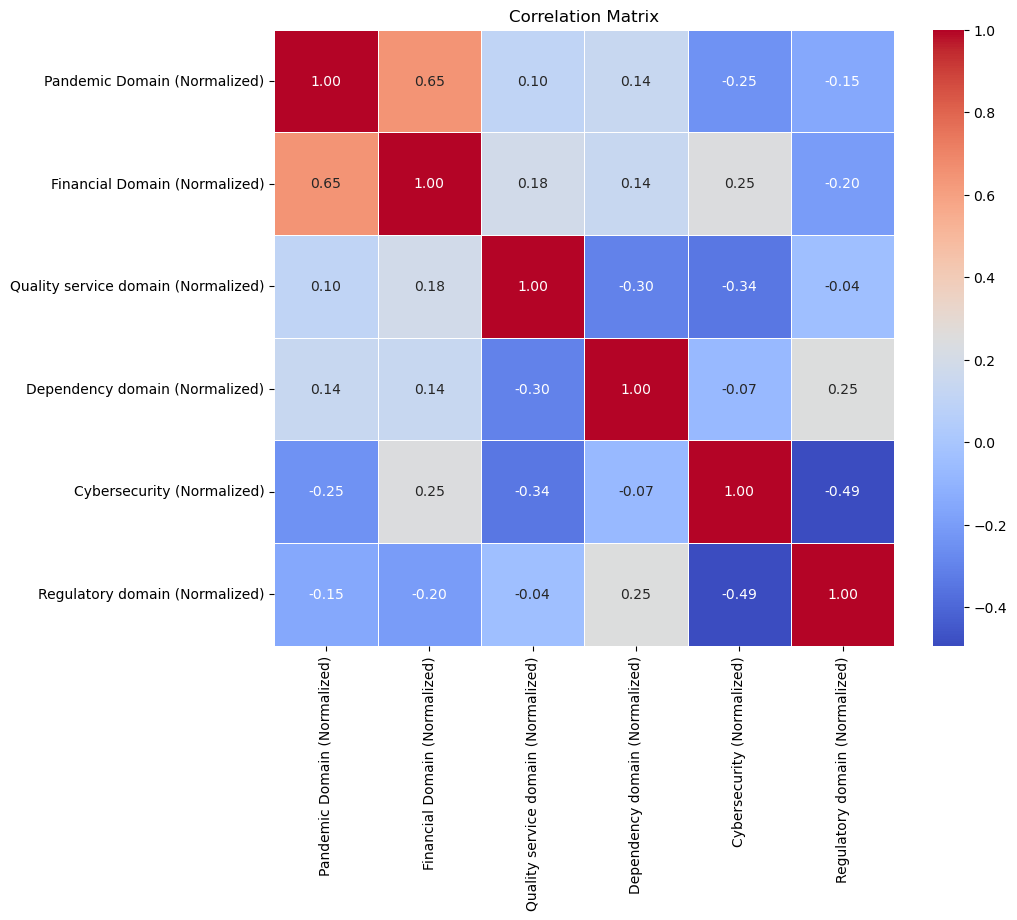

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_normalize = ['Pandemic Domain (Normalized)', 'Financial Domain (Normalized)', 
                        'Quality service domain (Normalized)', 'Dependency domain (Normalized)', 
                        'Cybersecurity (Normalized)', 'Regulatory domain (Normalized)']


correlation_matrix = supp_RIN[columns_to_normalize].corr()

# Define significance levels based on the absolute value of the correlation coefficient
def significance_level(value):
    if abs(value) >= 0.7:
        return "Strong"
    elif abs(value) >= 0.5:
        return "Moderate"
    else:
        return "Weak"

print("\nMost Significant Correlation Coefficients:")
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2:
            corr_value = correlation_matrix.loc[col1, col2]
            sig = significance_level(corr_value)
            
           
            if sig == "Strong":
                print(f"{col1} - {col2}: {corr_value} ({sig})")


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()



In [107]:
weights = [0.20, 0.218, 0.155, 0.155, 0.155, 0.155]

supp_RIN['Performance Value'] = (supp_RIN[columns_to_normalize] * weights).sum(axis=1)

print("DataFrame with Performance Value:")
print(supp_RIN[['Supplier Name', 'Performance Value']])

DataFrame with Performance Value:
      Supplier Name  Performance Value
index                                 
1           Plaxian           0.570720
2         GutesGlas           0.841326
3          Boavidro           0.674216
4            Saanch           0.957738
5         RealGlass           0.775213
6          Optikiet           0.769273
7        BestOGlass           0.634617
8       MedicMetric           0.753667
9             Shale           0.809475
10         Opticful           0.791869
11       basicPharm           0.498440
12       PharmyLeaf           0.942266


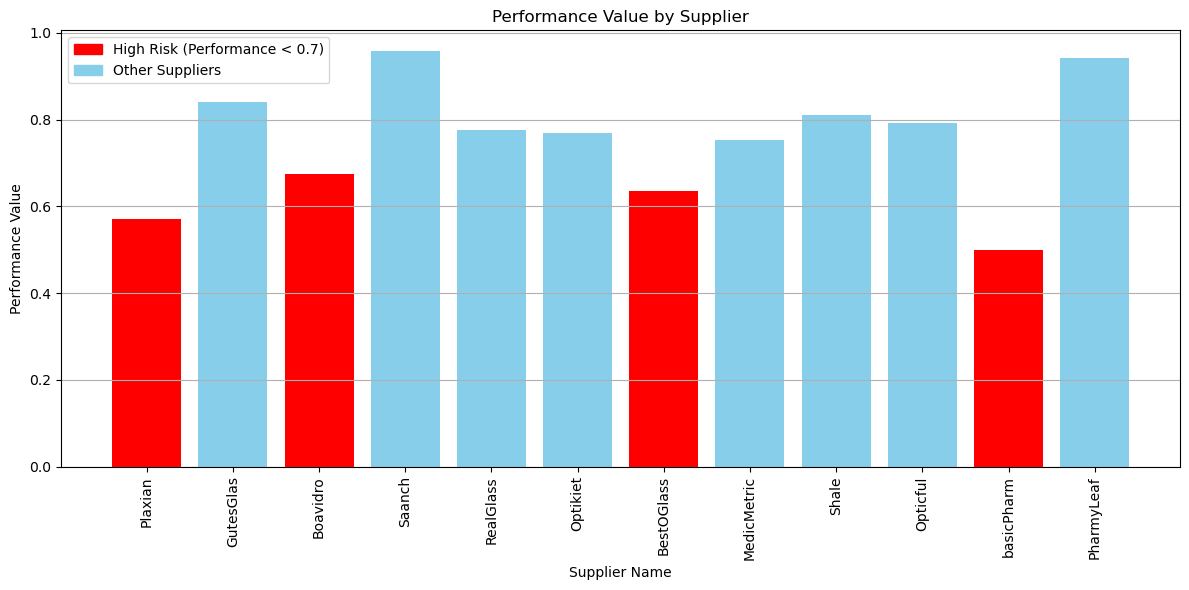

In [108]:
import matplotlib.pyplot as plt


supp_RIN['Performance Value'] = (supp_RIN[columns_to_normalize] * weights).sum(axis=1)


plt.figure(figsize=(12, 6))

# Plot bars with color based on the "Performance Value"
colors = ['red' if value < 0.7 else 'skyblue' for value in supp_RIN['Performance Value']]
bars = plt.bar(supp_RIN['Supplier Name'], supp_RIN['Performance Value'], color=colors)


plt.xlabel('Supplier Name')
plt.ylabel('Performance Value')
plt.title('Performance Value by Supplier')

plt.xticks(rotation=90)

# Add gridlines on the y-axis for better visualization
plt.grid(axis='y')

# Add a legend for clarity
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', edgecolor='red', label='High Risk (Performance < 0.7)'),
                   Patch(facecolor='skyblue', edgecolor='skyblue', label='Other Suppliers')]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()
